In [17]:
import jieba
import pandas as pd

file = r'D:\Programing\python_projects\data_analysis\data_set\weibo_data.csv'
weibo = pd.read_csv(file)
weibo.count()

id                 978
weibo_id           978
weibo_cont         978
weibo_img          413
weibo_video          6
repost_num         978
comment_num        978
praise_num         978
uid                978
is_origin          978
device             971
weibo_url          978
create_time        978
comment_crawled    978
repost_crawled     978
dtype: int64

In [18]:
weibo.head()

,id,weibo_id,weibo_cont,weibo_img,weibo_video,repost_num,comment_num,praise_num,uid,is_origin,device,weibo_url,create_time,comment_crawled,repost_crawled
0,1,4181170234743675,#L7快讯# 洛杉矶知名定制鞋店 The Shoe Surgeon 打造 Air Jorda...,https://wx3.sinaimg.cn/thumbnail/726e06e1ly1fm...,NaN,0,0,2,1919813345,1,iPhone客户端,//weibo.com/1919813345/Fy3BJjU2T?refer_flag=10...,2017-12-04 09:48,0,0
1,2,4181168968596327,今年的概念AI，python成了网红，快翻牌子。 网页链接 ​,NaN,NaN,0,0,0,3181729955,1,iOS,//weibo.com/3181729955/Fy3zGA4ir?refer_flag=10...,2017-12-04 09:43,0,0
2,3,4181159233315332,#开发好帮手#【命令行还可以这么玩？！】笔者曾好奇过命令行里那些花里胡哨的进度条是如何实现的...,NaN,NaN,0,0,1,2652479851,1,搜狗高速浏览器,//weibo.com/2652479851/Fy3jZdUt6?refer_flag=10...,2017-12-04 09:05,0,0
3,4,4181157074004829,【(Docker)更快(19% faster)、更小(75% smaller)的Python...,https://wx2.sinaimg.cn/thumbnail/5396ee05ly1fm...,NaN,11,1,6,1402400261,1,Mac客户端,//weibo.com/1402400261/Fy3gvgNQ1?refer_flag=10...,2017-12-04 08:56,0,0
4,5,4181152358794909,昨天拿python写了下并行运算，发现完全跑不了。自己还是需要学习 |日本·东京 ​,NaN,NaN,0,0,0,5746249343,1,iPhone客户端,//weibo.com/5746249343/Fy38TATXn?refer_flag=10...,2017-12-04 08:37,0,0


In [19]:
# 各平台都有分词的接口，现在使用结巴
content = weibo['weibo_cont']
content_cut = content.apply(jieba.cut).apply(list)
content_cut

0      [#, L7, 快讯, #,  , 洛杉矶, 知名, 定制, 鞋店,  , The,  , ...
1      [今年, 的, 概念, AI, ，, python, 成, 了, 网红, ，, 快, 翻, ...
2      [#, 开发, 好帮手, #, 【, 命令行, 还, 可以, 这么, 玩, ？, ！, 】,...
3      [【, (, Docker, ), 更, 快, (, 19%,  , faster, ), ...
4      [昨天, 拿, python, 写, 了, 下, 并行, 运算, ，, 发现, 完全, 跑不...
                             ...                        
973    [昨天, Python, 集训营, ，, 今天, 机器, 学习, 集训营, 2, 第, 5,...
974    [昨天, Python, 集训营, ，, 今天, 机器, 学习, 集训营, 2, 第, 5,...
975    [终于, 写出, 第一个, Ｃ, 语言, 的, 程序, 了, ，, 以前, 学, pytho...
976    [昨天, Python, 集训营, ，, 今天, 机器, 学习, 集训营, 2, 第, 5,...
977    [对, Python, 和, 日语, 执念, 太深,  , 不, 学, 不是, 中国, 人,...
Name: weibo_cont, Length: 978, dtype: object

In [20]:
# 统计词频
word_freq = dict()

for one in content_cut:
    for word in one:
        word_freq[word] = word_freq.get(word, 0) + 1

(-0.5, 599.5, 399.5, -0.5)

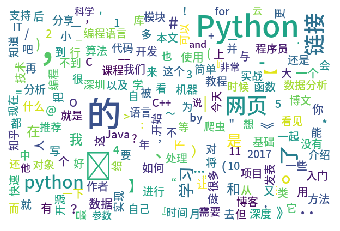

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r'C:\Windows\Fonts\SourceHanSans-Medium_0.ttc'
word_cloud = WordCloud(font_path=font,
                       background_color='white',
                       max_words=200,
                       max_font_size=100,
                       random_state=2,
                       width=600,
                       height=400,
                       margin=2)
word_cloud.generate_from_frequencies(word_freq)

plt.figure()
plt.imshow(word_cloud)
plt.axis('off')

In [27]:
file_stop = r'D:\Programing\python_projects\Self-study\mystopword.txt'
stopwords = []
new_freq = dict()

with open(file_stop, encoding='utf-8') as f:
    stopwords = f.read()

for k, v in word_freq.items():
    if k not in stopwords:
        new_freq[k] = v

print(new_freq)

{'L7': 1, '快讯': 1, '洛杉矶': 1, '知名': 1, '定制': 3, '鞋店': 1, 'The': 11, 'Shoe': 4, 'Surgeon': 4, '打造': 8, 'Air': 5, 'Jordan': 5, '系列': 17, 'Shattered': 5, 'Python': 1165, '配色': 4, '鞋身': 3, '依旧': 1, '采用': 1, '原': 2, '色调': 1, '白橙': 1, '蛇皮': 1, '材质': 1, '定价': 1, '3500': 1, '美元': 1, '准备': 8, '入手': 5, '更': 53, '详情': 7, '网页': 578, '链接': 576, '\u200b': 1010, '今年': 5, '概念': 13, 'AI': 12, 'python': 393, '网红': 1, '快': 13, '翻': 2, '牌子': 1, '开发': 88, '好帮手': 1, '【': 266, '命令行': 4, '玩': 25, '】': 265, '笔者': 2, '好奇': 7, '花里胡哨': 1, '进度条': 1, '实现': 75, 'Spring': 1, 'Boot': 1, '能够': 12, '打印': 9, '五颜六色': 1, '日志': 5, 'PHP': 20, '脚本语言': 4, '交互式': 4, 'Vim': 1, 'Emacs': 1, 'Terminal': 1, '编辑器': 2, '本文': 38, '分答': 1, '(': 174, 'Docker': 1, ')': 216, '19%': 1, 'faster': 1, '75%': 1, 'smaller': 1, '编译': 5, '版': 13, '3.6': 2, '.': 233, 'Optimized': 1, 'by': 45, 'Frank': 1, 'Wiles': 1, '昨天': 4, '写': 84, '并行': 1, '运算': 12, '发现': 30, '完全': 11, '跑不了': 1, '需要': 35, '学习': 310, '|': 260, '日本': 2, '·': 61, '东京': 1, 'turns': 1

(-0.5, 599.5, 399.5, -0.5)

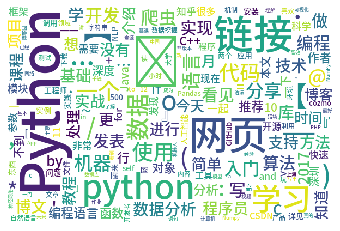

In [28]:
new_word_cloud = WordCloud(font_path=font,
                           background_color='white',
                           max_words=200,
                           max_font_size=100,
                           random_state=2,
                           width=600,
                           height=400,
                           margin=2)
new_word_cloud.generate_from_frequencies(new_freq)

plt.figure()
plt.imshow(new_word_cloud)
plt.axis('off')